## Part 1 - NBA Player Comparision

This project shall look at NBA players shooting statistics. Using the shooting log from the 2016/17 season we shall see visualizations on different players in the league.

#### Loading Data

In [12]:
#importing the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# The data consists of the shot log for the NBA season 2016/17

shot = pd.read_csv("Assignment Data/Week 3/NBA shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


#### Graphs displaying all the shots taken throughout the season 

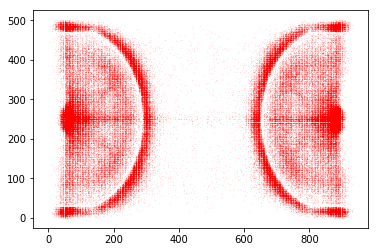

In [14]:
# A simple plot of coordinates

x = shot['location_x']
y = shot['location_y']
plt.scatter(x,y, s=.005,c='r', marker= '.')

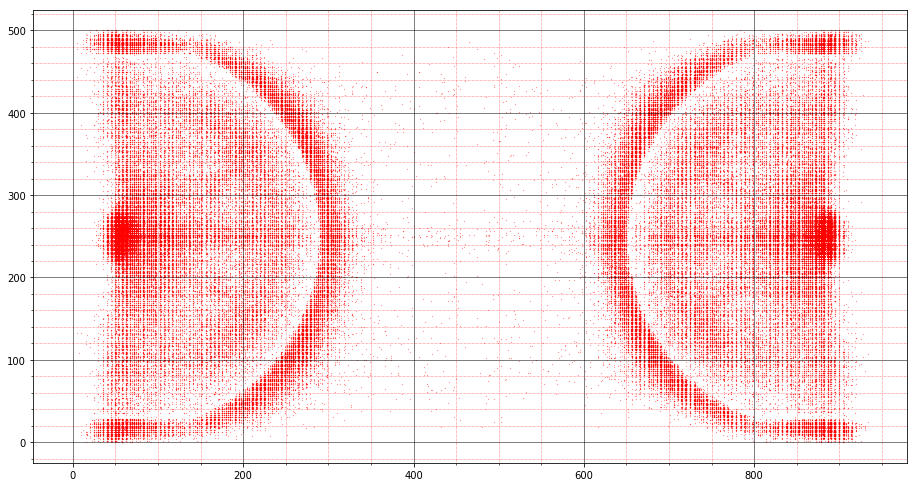

In [19]:
# A simple plot of coordinates, scaled for court dimensions and with grid added.

plt.figure(figsize=(94/6,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')

(466.5, 933)

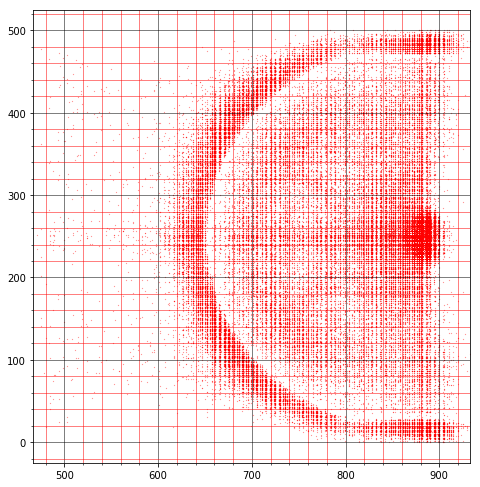

In [21]:
# The right hand half court

plt.figure(figsize=(94/12,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linewidth='.5', color='black')
plt.grid(which='minor', linewidth='.5', color='red')
plt.xlim(933/2, 933)

In [23]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


Text(0.5, 1.0, 'Shots')

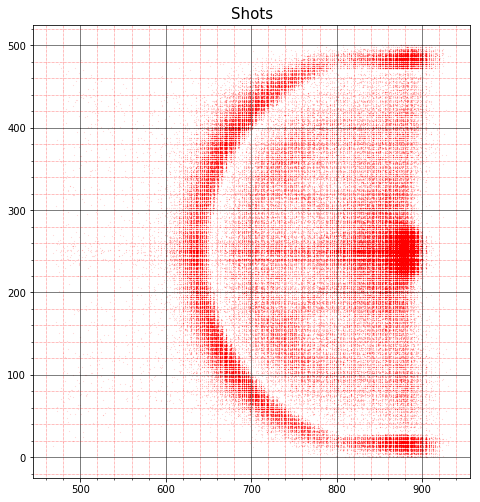

In [24]:
# all shots shown on a half court

hx = shot['halfcourt_x']
hy = shot['halfcourt_y']
plt.figure(figsize=(94/12,50/6))
plt.scatter(hx,hy, s=.01,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Shots", fontsize = 15)

Text(0.5, 1.0, 'Scored')

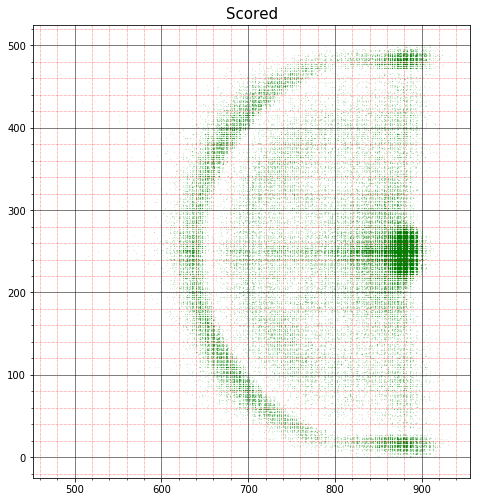

In [25]:
# Scoring shots

Scored = shot[shot.current_shot_outcome == 'SCORED']
hxs = Scored['halfcourt_x']
hys = Scored['halfcourt_y']
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxs,hys, s=.01,c='g', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Scored", fontsize = 15)

Text(0.5, 1.0, 'Missed')

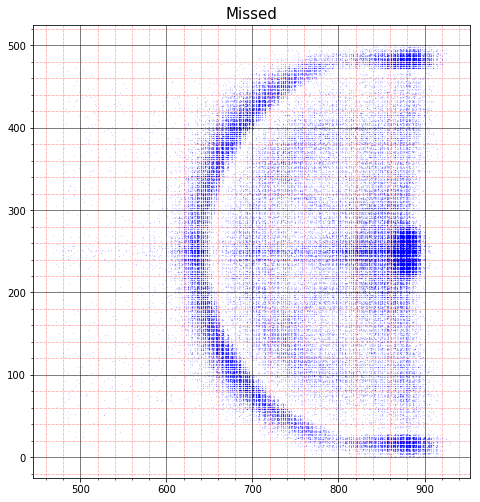

In [26]:
# Missed Shots

Missed = shot[shot.current_shot_outcome == 'MISSED']

hxm = Missed['halfcourt_x']
hym = Missed['halfcourt_y']

plt.figure(figsize=(94/12,50/6))
plt.scatter(hxm,hym, s=.01,c='b', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Missed", fontsize = 15)

With the formulas above we display the different shooting plots for some players. Below are the shooting performaces of Kevin Durant, Dwight Howard, DeAndre Jordan, Russell Westbrook and twins Brook and Robin Lopez.

On these graphs, red dots represent shots scored, blue dots are shots missed, while green dots are shots blocked.

## Kevin Durant Subset

In [41]:
Durant = shot[shot['shoot_player']=='Kevin Durant']
Durant.head()

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
63211,MISSED,SF,Yes,197.0,SCORED,GSW,Turnaround Fadeaway,2,SAS,244.0,1:05,10/25/2016,Kevin Durant,26.0,1,SCORED,736.0,256.0
63217,MISSED,SF,Yes,98.0,MISSED,GSW,Step Back Jump Shot,2,SAS,87.0,5:01,10/25/2016,Kevin Durant,27.0,1,SCORED,835.0,413.0
63218,SCORED,SF,Yes,92.0,MISSED,GSW,Turnaround Fadeaway,2,SAS,413.0,5:34,10/25/2016,Kevin Durant,33.0,1,SCORED,841.0,87.0
63219,SCORED,SF,Yes,244.0,MISSED,GSW,Pullup Jump Shot,3,SAS,423.0,5:59,10/25/2016,Kevin Durant,25.0,1,SCORED,689.0,77.0
63227,SCORED,SF,Yes,103.0,SCORED,GSW,Pullup Jump Shot,2,SAS,125.0,11:07,10/25/2016,Kevin Durant,35.0,1,MISSED,830.0,375.0


Text(0.5, 1.0, 'Kevin Durant')

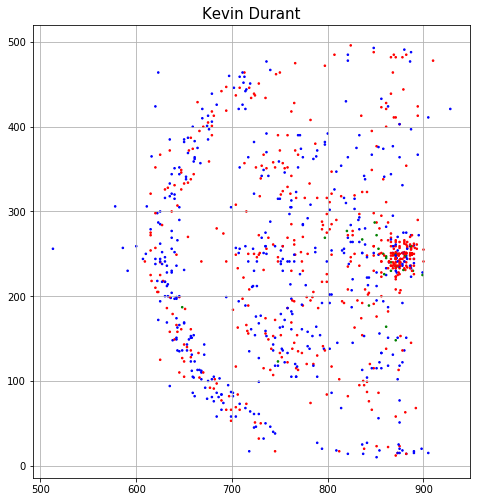

In [42]:
hxD = Durant['halfcourt_x']
hyD = Durant['halfcourt_y']
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxD,hyD, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Kevin Durant", fontsize = 15)

## Dwight Howard subset

In [47]:
Howard = shot[shot['shoot_player']=='Dwight Howard']
Howard.head()

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,10/27/2016,Dwight Howard,2.0,1,SCORED,881.0,250.0
8,MISSED,C,Yes,107.0,SCORED,ATL,Turnaround Jump Shot,2,WAS,254.0,4:04,10/27/2016,Dwight Howard,3.0,1,MISSED,826.0,246.0
15,MISSED,C,Yes,62.0,MISSED,ATL,Jump Shot,2,WAS,329.0,7:36,10/27/2016,Dwight Howard,3.0,1,SCORED,871.0,171.0
17,MISSED,C,Yes,82.0,MISSED,ATL,Jump Bank Shot,2,WAS,373.0,8:22,10/27/2016,Dwight Howard,22.0,1,MISSED,851.0,127.0
39,MISSED,C,Yes,112.0,MISSED,ATL,Hook Shot,2,WAS,278.0,8:37,10/27/2016,Dwight Howard,125.0,2,SCORED,821.0,222.0


Text(0.5, 1.0, 'Dwight Howard')

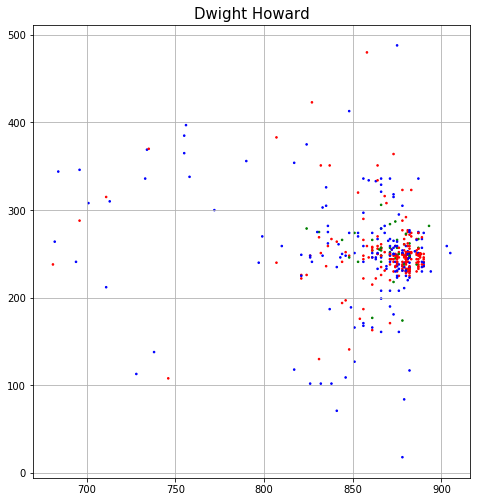

In [48]:
hxH = Howard['halfcourt_x']
hyH = Howard['halfcourt_y']
colors = np.where(Howard['current_shot_outcome']=='SCORED','r',np.where(Howard['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxH,hyH, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Dwight Howard", fontsize = 15)

## DeAndre Jordan subset

In [49]:
DeAndre = shot[shot['shoot_player']=='DeAndre Jordan']
DeAndre.head()

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
84433,MISSED,C,No,895.0,MISSED,POR,Layup,2,LAC,267.0,3:33,10/27/2016,DeAndre Jordan,2.0,1,BLOCKED,895.0,267.0
84435,MISSED,C,No,888.0,BLOCKED,POR,Putback Dunk,2,LAC,250.0,4:08,10/27/2016,DeAndre Jordan,0.0,1,SCORED,888.0,250.0
84466,MISSED,C,No,878.0,SCORED,POR,Reverse Layup,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,17.0,2,MISSED,878.0,272.0
84467,MISSED,C,No,887.0,SCORED,POR,Tip Layup Shot,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,0.0,2,MISSED,887.0,272.0
84477,MISSED,C,No,51.0,SCORED,POR,Tip Layup Shot,2,LAC,249.0,2:23,10/27/2016,DeAndre Jordan,1.0,3,MISSED,882.0,251.0


Text(0.5, 1.0, 'DeAndre Jordan')

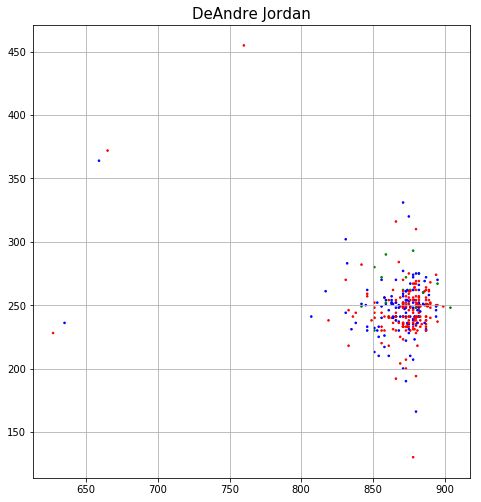

In [50]:
hxJ = DeAndre['halfcourt_x']
hyJ = DeAndre['halfcourt_y']
colors = np.where(DeAndre['current_shot_outcome']=='SCORED','r',np.where(DeAndre['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxJ,hyJ, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("DeAndre Jordan", fontsize = 15)

## Russell Westbrook subset

In [43]:
Westbrook = shot[shot['shoot_player']=='Russell Westbrook']
Westbrook.head()

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
140311,NaN,PG,No,853.0,NaN,PHI,Jump Shot,2,OKL,76.0,0:17,10/26/2016,Russell Westbrook,NaN,1,MISSED,853.0,76.0
140314,MISSED,PG,No,802.0,SCORED,PHI,Pullup Jump Shot,2,OKL,367.0,1:51,10/26/2016,Russell Westbrook,50.0,1,SCORED,802.0,367.0
140319,BLOCKED,PG,No,853.0,SCORED,PHI,Jump Shot,2,OKL,308.0,3:59,10/26/2016,Russell Westbrook,27.0,1,BLOCKED,853.0,308.0
140321,SCORED,PG,No,809.0,SCORED,PHI,Pullup Jump Shot,2,OKL,433.0,4:54,10/26/2016,Russell Westbrook,34.0,1,MISSED,809.0,433.0
140322,MISSED,PG,No,895.0,SCORED,PHI,Driving Finger Roll Layup,2,OKL,270.0,5:44,10/26/2016,Russell Westbrook,50.0,1,SCORED,895.0,270.0


Text(0.5, 1.0, 'Russell Westbrook')

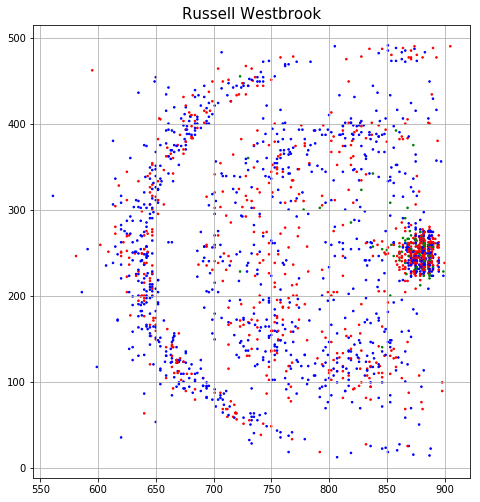

In [44]:
hxW = Westbrook['halfcourt_x']
hyW = Westbrook['halfcourt_y']
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxW,hyW, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Russell Westbrook", fontsize = 15)

## Brook Lopez subset

In [54]:
Brook = shot[shot['shoot_player']=='Brook Lopez']
Brook.head()

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
13896,NaN,C,No,878.0,NaN,BOS,Driving Hook Shot,2,BRO,151.0,0:14,10/26/2016,Brook Lopez,NaN,1,MISSED,878.0,151.0
13900,SCORED,C,No,828.0,MISSED,BOS,Jump Shot,2,BRO,288.0,2:24,10/26/2016,Brook Lopez,34.0,1,BLOCKED,828.0,288.0
13904,MISSED,C,No,890.0,MISSED,BOS,Tip Layup Shot,2,BRO,250.0,3:57,10/26/2016,Brook Lopez,1.0,1,MISSED,890.0,250.0
13907,SCORED,C,No,882.0,SCORED,BOS,Layup,2,BRO,241.0,5:37,10/26/2016,Brook Lopez,25.0,1,MISSED,882.0,241.0
13920,MISSED,C,No,647.0,SCORED,BOS,Jump Shot,3,BRO,199.0,1:41,10/26/2016,Brook Lopez,38.0,2,SCORED,647.0,199.0


Text(0.5, 1.0, 'Brook Lopez')

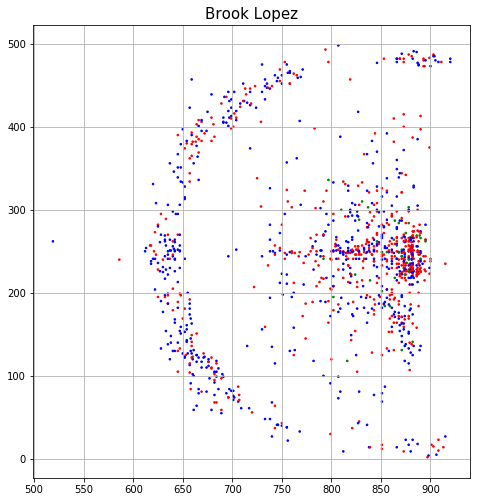

In [55]:
hxB = Brook['halfcourt_x']
hyB = Brook['halfcourt_y']
colors = np.where(Brook['current_shot_outcome']=='SCORED','r',np.where(Brook['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxB,hyB, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Brook Lopez", fontsize = 15)

## Robin Lopez

In [56]:
Robin = shot[shot['shoot_player']=='Robin Lopez']
Robin.head()

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
27886,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2,BOS,243.0,1:27,10/27/2016,Robin Lopez,12.0,1,MISSED,831.0,257.0
27894,MISSED,C,Yes,67.0,SCORED,CHI,Tip Layup Shot,2,BOS,246.0,5:15,10/27/2016,Robin Lopez,1.0,1,SCORED,866.0,254.0
27896,SCORED,C,Yes,52.0,MISSED,CHI,Cutting Dunk Shot,2,BOS,250.0,6:51,10/27/2016,Robin Lopez,56.0,1,SCORED,881.0,250.0
27898,BLOCKED,C,Yes,146.0,MISSED,CHI,Jump Shot,2,BOS,401.0,7:14,10/27/2016,Robin Lopez,7.0,1,MISSED,787.0,99.0
27900,SCORED,C,Yes,72.0,SCORED,CHI,Turnaround Hook Shot,2,BOS,174.0,8:21,10/27/2016,Robin Lopez,38.0,1,MISSED,861.0,326.0


Text(0.5, 1.0, 'Robin Lopez')

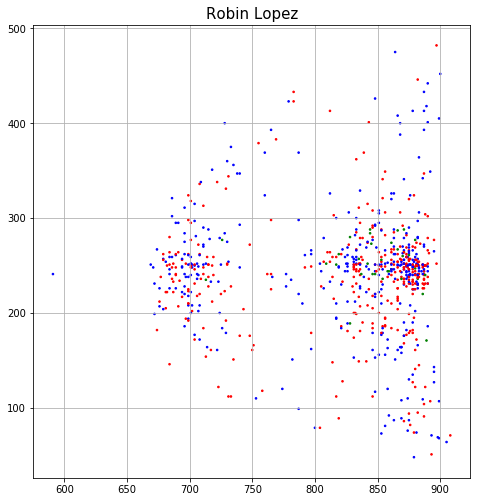

In [57]:
hxR = Robin['halfcourt_x']
hyR = Robin['halfcourt_y']
colors = np.where(Robin['current_shot_outcome']=='SCORED','r',np.where(Robin['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxR,hyR, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Robin Lopez", fontsize = 15)

Player graphs can also be compared, so we can see the shooting graphs for our six players side by side.

## Westbrook - Durant Comparision

Text(0.5, 1.0, 'Kevin Durant')

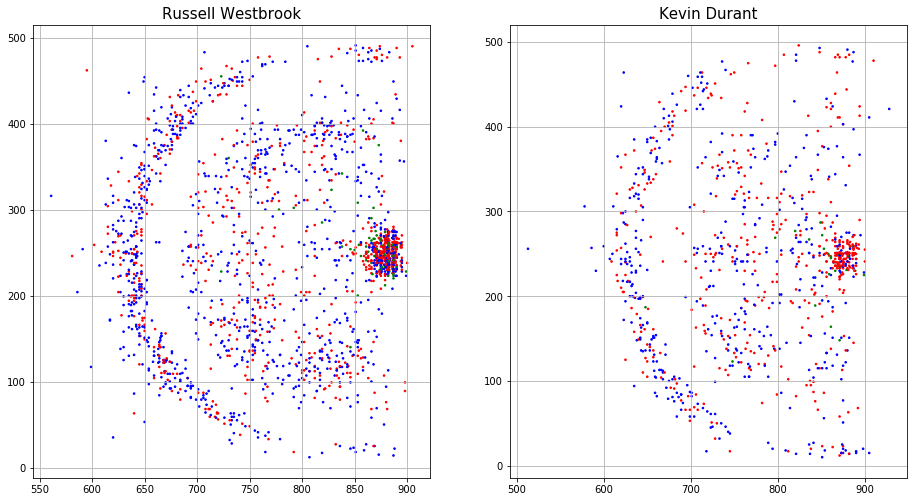

In [46]:
f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxW,hyW, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Russell Westbrook", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxD,hyD, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Kevin Durant", fontsize = 15)

## Jordan - Howard Comparision

Text(0.5, 1.0, 'Dwight Howard')

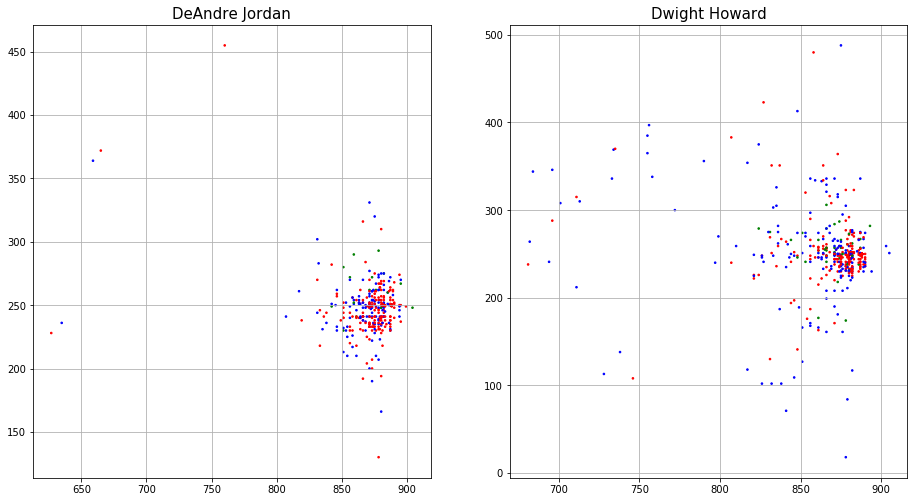

In [51]:
f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(DeAndre['current_shot_outcome']=='SCORED','r',np.where(DeAndre['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxJ,hyJ, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("DeAndre Jordan", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Howard['current_shot_outcome']=='SCORED','r',np.where(Howard['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxH,hyH, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Dwight Howard", fontsize = 15)

## Lopez - Lopez Comparision

Text(0.5, 1.0, 'Robin Lopez')

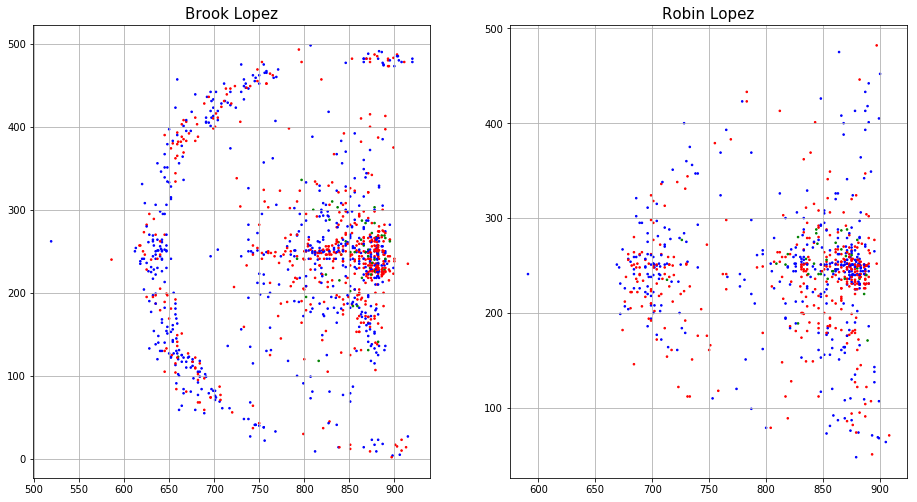

In [58]:
f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Brook['current_shot_outcome']=='SCORED','r',np.where(Brook['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxB,hyB, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Brook Lopez", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Robin['current_shot_outcome']=='SCORED','r',np.where(Robin['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxR,hyR, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Robin Lopez", fontsize = 15)